In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [2]:
#reading data
data = pd.read_csv("house_prices_subset_IrinaCruceru.csv")

In [3]:
data.head(5)

,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,SalePrice
0,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,145000
1,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,178000
2,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,85000
3,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,175000
4,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,127000


In [4]:
#creating a subset with numerical columns only
df=data.select_dtypes(include=['number'])

In [5]:
df.isna().any(axis=1).sum()

np.int64(0)

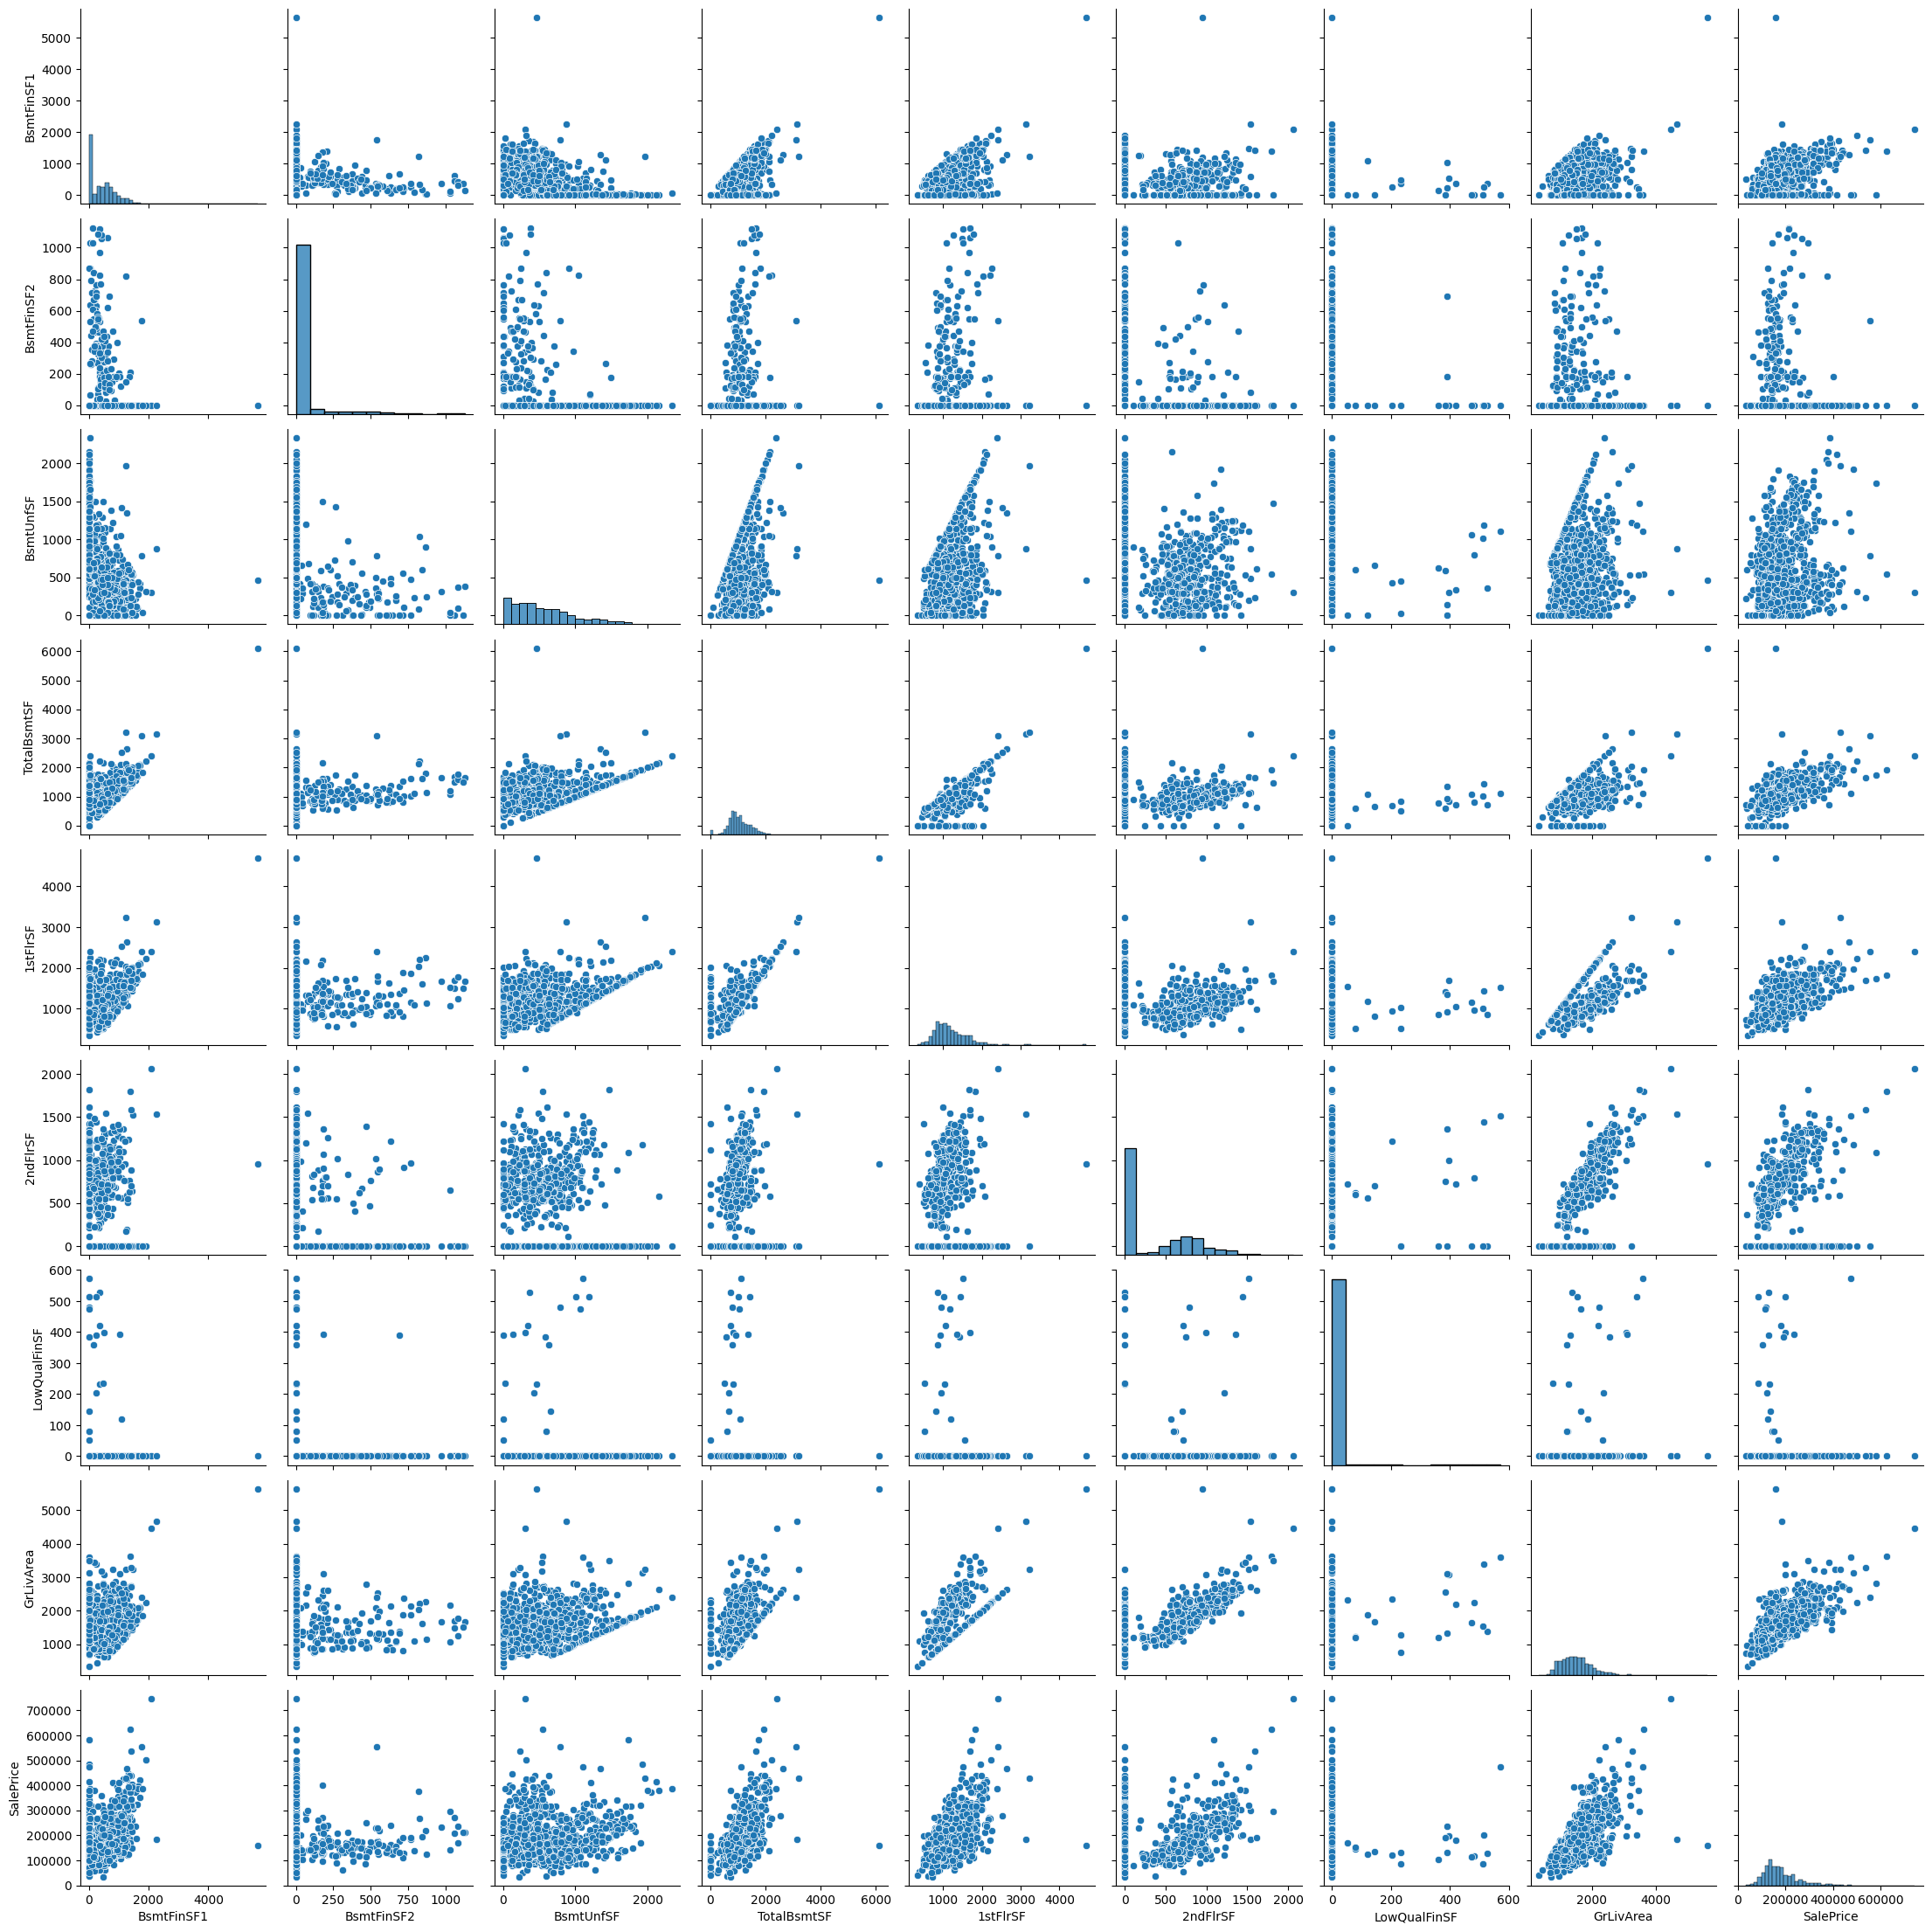

In [6]:
#creating the pair plot
sns.pairplot(df)

Sale price and variables relationhips:
- GrLivArea - strong positive correlation, linear
- TotalBsmtSF - clear positive trend, linear
- 1stFlrSF -  also strongly correlated, linear
- BsmtFinSF1, 2ndFlrSF, BsmtUnfSF - positive correlation, but weaker that first 3 variables
- BsmtFinSF2, LowQualFinSF

Relationhips of other variables:

Strong positive linear relationship:
- TotalBsmtSF and 1stFlrSF
-	TotalBsmtSF and GrLivArea
-	1stFlrSF and GrLivArea
-	BsmtFinSF1 and TotalBsmtSF

Moderate positive linear relationship
- BsmtFinSF1 and 1stFlrSF
-	BsmtFinSF1 and GrLivArea
-	2ndFlrSF and GrLivArea
-	2ndFlrSF and 1stFlrSF

Weak or no linear relationship
- LowQualFinSF and Any other variable
-	BsmtFinSF2 and Any other variable
-	BsmtUnfSF and GrLivArea / 1stFlrSF / TotalBsmtSF
-	2ndFlrSF and TotalBsmtSF

Mild negative relationship
- BsmtFinSF1 and BsmtUnfSF
-	BsmtFinSF2 and BsmtUnfSF



In [14]:
#variables i will include for my linear model are GrLivArea, TotalBsmtSF and 1stFlrSF
houses = data[["GrLivArea", "TotalBsmtSF", "1stFlrSF", "SalePrice"]]
#renaming the column since starting with a number causes problems
houses = houses.rename(columns={'1stFlrSF': 'FirstFlrSF'})

In [22]:
houses.head(5)

,GrLivArea,TotalBsmtSF,FirstFlrSF,SalePrice
0,1314,1314,1314,145000
1,1571,799,799,178000
2,796,796,796,85000
3,1768,731,981,175000
4,1691,1026,1026,127000


In [23]:
# Write the linear regression formula.
ols_formula = "SalePrice ~ GrLivArea + TotalBsmtSF + FirstFlrSF"

In [24]:
# Implement OLS.
from statsmodels.formula.api import ols
OLS = ols(formula = ols_formula, data = houses)
model=OLS.fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     547.9
Date:                Sun, 19 Oct 2025   Prob (F-statistic):          5.81e-222
Time:                        20:51:14   Log-Likelihood:                -14288.
No. Observations:                1168   AIC:                         2.858e+04
Df Residuals:                    1164   BIC:                         2.861e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4413.9343   5123.593     -0.861      0.389   -1.45e+04    5638.577
GrLivArea      79.4678      3.349     23.727      0.000      72.896      86.039
TotalBsmtSF    65.0059      5.893     11.031      0.000      53.444      76.568
FirstFlrSF     -3.8869      7.220     -0.538      0.590     -18.053      10.279
==============================================================================
Omnibus:                      667.073   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48308.435
Skew:                          -1.800   Prob(JB):                         0.00
Kurtosis:                      34.300   Cond. No.                     8.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

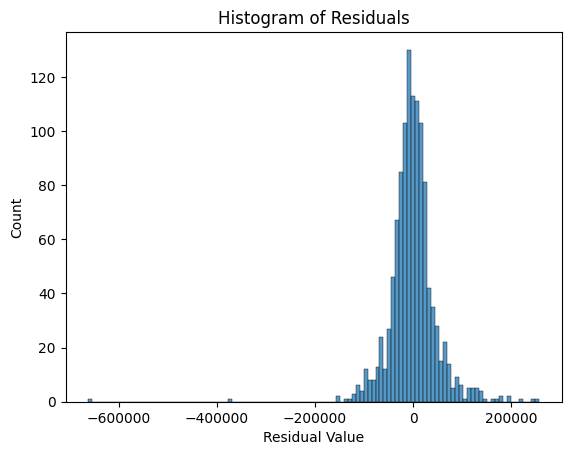

In [26]:
#Normality assumption
# Get the residuals from the model.
residuals = model.resid
#plotting
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

The distribution of residuals follows a normal distribution so the normality assumption is met.

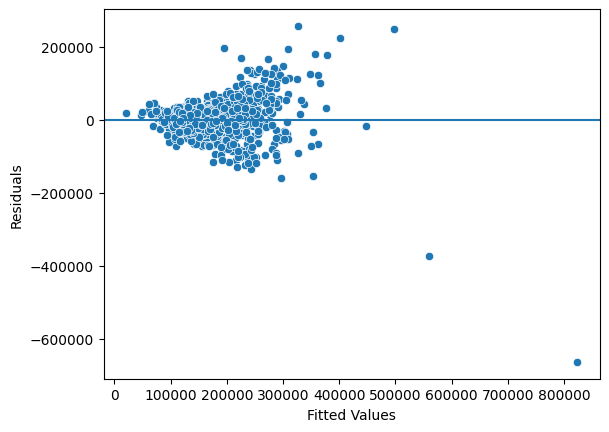

In [28]:
#homoscedasticity assumption
# Get fitted values.
fitted_values = model.predict(houses[['GrLivArea', 'TotalBsmtSF', 'FirstFlrSF']])
# Create a scatterplot of residuals against fitted values.

fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()

The plot does not resemble a cloud, so the assumption of homoscedasticity is not met. The plot has more of a funnel shape, suggesting it fits cheaper homes better that expensive ones.

The regression model shows that the size of a home is the main driver of sale price.
However, the model tends to underestimate very expensive homes, and its residuals suggest that prediction errors grow for larger properties.
Refining the model would improve accuracy and reliability.